In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
file_path = 'd:/work/source/kaggle/titanic/'
train_df = pd.read_csv(file_path + 'train.csv')
test_df = pd.read_csv(file_path + 'test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


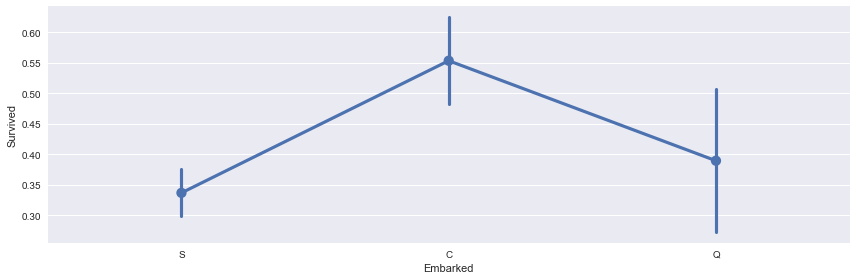

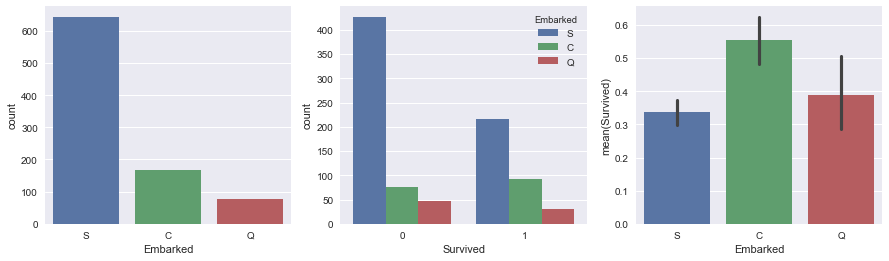

In [5]:
# Embarked
sns.factorplot('Embarked', 'Survived', data=train_df, aspect=3)  # aspect横纵比

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 4))  # figsize

sns.countplot('Embarked', data=train_df, ax=axis1)
sns.countplot('Survived', hue='Embarked', data=train_df, ax=axis2)
embark_mean = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot('Embarked', 'Survived', data=train_df, ax=axis3)


train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [6]:
# Fare
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)  # inplace表示替换原始数组
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,NaN,S


                  0
Survived           
0         21.690346
1         47.991228


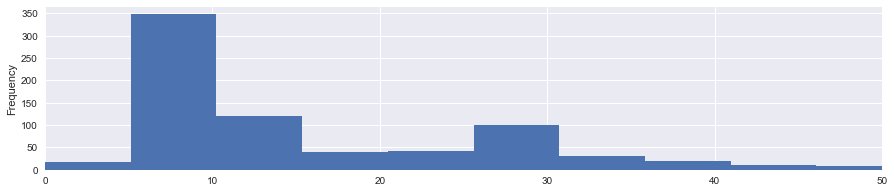

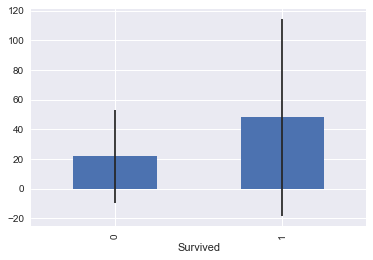

In [7]:
fare_not_sur = train_df['Fare'][train_df['Survived'] == 0]
fare_sur = train_df['Fare'][train_df['Survived'] == 1]

avgerage_fare = pd.DataFrame([fare_not_sur.mean(), fare_sur.mean()])
std_fare = pd.DataFrame([fare_not_sur.std(), fare_sur.std()])

train_df['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))
avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare, kind='bar', legend=False)
print(avgerage_fare)

D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


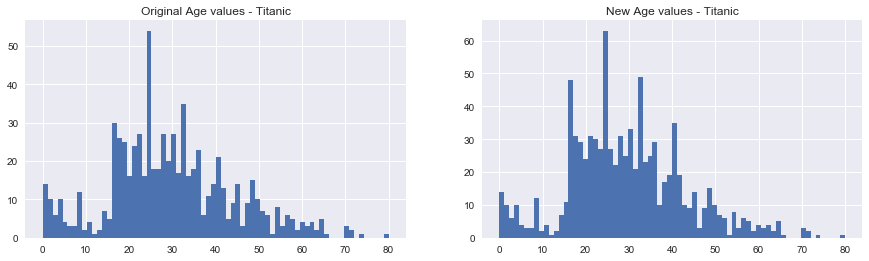

In [8]:
# Age 

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = train_df["Age"].mean()
std_age_titanic = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, 
                           size=count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
train_df['Age'] = train_df['Age'].astype(np.int64)
test_df['Age'] = test_df['Age'].astype(np.int64)
        
# plot new Age Values
train_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

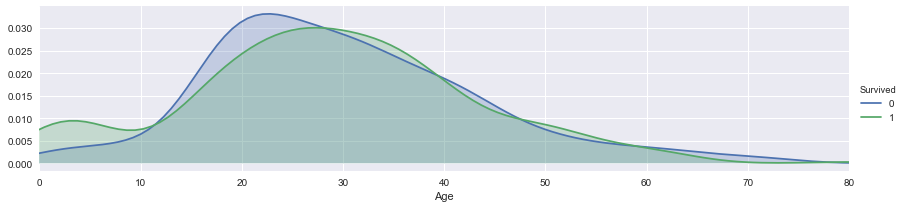

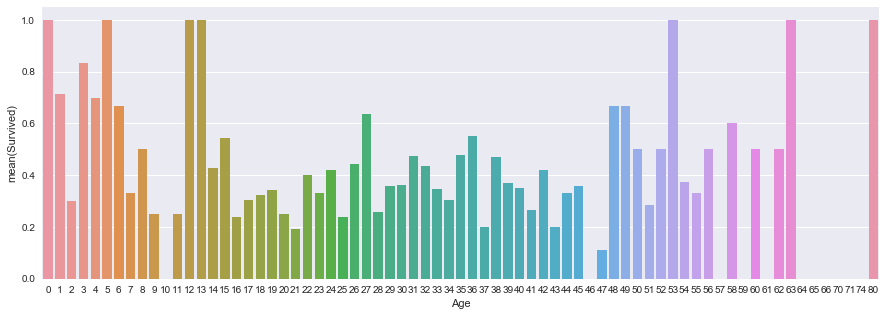

In [9]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(figsize=(15, 5))
average_age = train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
sns.barplot('Age', 'Survived', data=average_age)

In [10]:
# Cabin
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


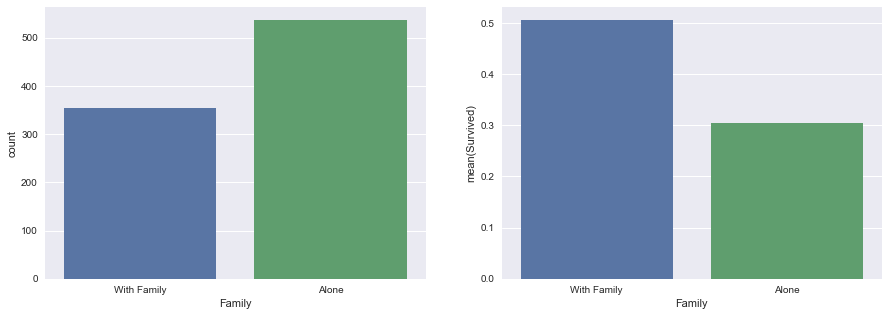

In [11]:
# Family
train_df['Family'] = train_df['Parch'] + train_df['SibSp']
train_df['Family'][train_df['Family'] > 0] = 1
test_df['Family'] = test_df['Parch'] + test_df['SibSp']
test_df['Family'][test_df['Family'] > 0] = 1

train_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)

fig, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
sns.countplot('Family', data=train_df, order=[1, 0], ax=axis1)


family_sur = train_df[['Family', 'Survived']].groupby('Family', as_index=False).mean()
sns.barplot('Family', 'Survived', data=family_sur, order=[1, 0], ax=axis2)
axis1.set_xticklabels(['With Family', 'Alone'], rotation=0)

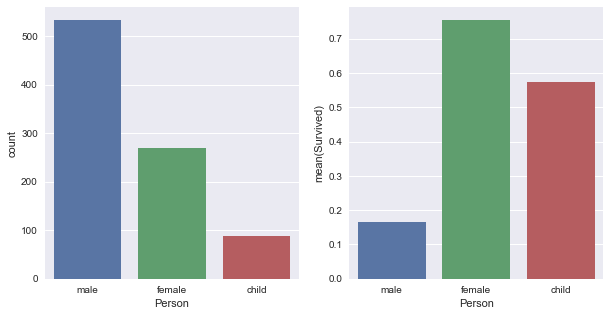

In [12]:
# Sex
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

train_df['Person'] = train_df[['Age', 'Sex']].apply(get_person, axis=1)
test_df['Person'] = train_df[['Age', 'Sex']].apply(get_person, axis=1)

train_df.drop('Sex', axis=1, inplace=True)
test_df.drop('Sex', axis=1, inplace=True)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male', 'female', 'child'])

In [13]:
name_title = train_df.Name.apply(lambda x: x.split(', ')[1])
name_title = name_title.apply(lambda x: x.split('. ')[0])
train_df['name_title'] = name_title
train_df.drop('Name', axis=1, inplace=True)
name_title = test_df.Name.apply(lambda x: x.split(', ')[1])
name_title = name_title.apply(lambda x: x.split('. ')[0])
test_df['name_title'] = name_title
test_df.drop('Name', axis=1, inplace=True)

In [14]:
train_df['Pclass'][train_df['Pclass'] == 1] = 'class_1'
train_df['Pclass'][train_df['Pclass'] == 2] = 'class_2'
train_df['Pclass'][train_df['Pclass'] == 3] = 'class_3'
test_df['Pclass'][test_df['Pclass'] == 1] = 'class_1'
test_df['Pclass'][test_df['Pclass'] == 2] = 'class_2'
test_df['Pclass'][test_df['Pclass'] == 3] = 'class_3'

D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\work\anaconda\envs\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
test_df.sample(3)

,PassengerId,Pclass,Age,Ticket,Fare,Embarked,Family,Person,name_title
287,1179,class_1,24,21228,82,S,1,male,Mr
404,1296,class_1,43,17765,27,C,1,female,Mr
177,1069,class_1,54,11778,55,C,1,female,Mr


In [17]:
# defne training and testing sets
y_train = train_df['Survived']
x_train = train_df.drop(['Survived', 'PassengerId', 'Ticket'], axis=1)
x_test = test_df.drop(['PassengerId', 'Ticket'], axis=1)

In [18]:
x_train.sample(3)

,Pclass,Age,Fare,Embarked,Family,Person,name_title
683,class_3,14,46,S,1,child,Mr
689,class_1,15,211,S,1,child,Miss
175,class_3,18,7,S,1,male,Mr


In [23]:
def encode_feature(df):
    from sklearn import preprocessing
    
    features = ['Pclass', 'Person', 'Embarked', 'name_title']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

x_train = encode_feature(x_train)
x_test = encode_feature(x_test)
x_train.sample(3)

,Pclass,Age,Fare,Embarked,Family,Person,name_title
821,2,27,8,2,0,2,11
91,2,20,7,2,0,2,11
613,2,17,7,1,0,2,11


In [24]:
rm = RandomForestClassifier(n_estimators=100)
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)
rm.score(x_train, y_train)

0.96745230078563416

In [25]:
def train_split(x_train, y_train):
    from sklearn.model_selection import train_test_split

    num_test = 0.2
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=num_test, random_state=23)

    return x_train, x_valid, y_train, y_valid


def best_paramter_(x, y):
    from sklearn.metrics import make_scorer, accuracy_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    x_train, x_test, y_train, y_test = train_split(x, y)
    
    # 选择一些参数进行尝试
    clf = RandomForestClassifier()
    
    paramters = {
        'n_estimators': [10, 20, 50, 100],
        'max_features': ['log2', 'sqrt'],
        'criterion': ['entropy', 'gini'],
        'max_depth': [2, 3, 5, 10],
        'min_samples_split': [2, 3, 5, 7],
        'min_samples_leaf': [1, 5, 8]
    }
    acc_scorer = make_scorer(accuracy_score)

    grid_obj = GridSearchCV(clf, paramters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(x_train, y_train)
    clf = grid_obj.best_estimator_
    clf.fit(x_train, y_train)

    predic = clf.predict(x_test)
    print('the accuracy_score is {0}'.format(accuracy_score(y_test, predic)))
    print('the best paramters is {0}'.format(clf.get_params()))
    return clf
    

def run_kflod(clf, x_all, y_all):
    """ K折验证

    Args:
        clf: 分类器
        x_all: 训练集特征数据
        y_all: 训练集标签数据

    Returns: None

    """
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score

    kf = KFold(10)
    outcomes = list()
    fold = 0

    for train_index, test_index in kf.split(x_all):
        fold += 1
        x_train, x_test = x_all.values[train_index], x_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]

        clf.fit(x_train, y_train)
        predic = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predic)
        outcomes.append(accuracy)
        print('Fold {0} accuracy: {1}'.format(fold, accuracy))

    mean_outcomes = np.mean(outcomes)
    print('Mean accuracy: {0}'.format(mean_outcomes))

In [27]:
clf = best_paramter_(x_train, y_train)

the accuracy_score is 0.8324022346368715
the best paramters is {'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'warm_start': False, 'max_depth': 5, 'criterion': 'entropy', 'oob_score': False, 'min_weight_fraction_leaf': 0.0, 'bootstrap': True, 'class_weight': None, 'n_estimators': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'random_state': None, 'min_samples_split': 3}


In [28]:
run_kflod(clf, x_train, y_train)

Fold 1 accuracy: 0.7888888888888889
Fold 2 accuracy: 0.8651685393258427
Fold 3 accuracy: 0.7528089887640449
Fold 4 accuracy: 0.8539325842696629
Fold 5 accuracy: 0.8089887640449438
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7865168539325843
Fold 8 accuracy: 0.7528089887640449
Fold 9 accuracy: 0.8426966292134831


Fold 10 accuracy: 0.8314606741573034
Mean accuracy: 0.8103495630461923


In [35]:
clf.fit(x_train, y_train)
test_pred = clf.predict(x_test)
output_ = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_pred})
output_.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [36]:
output_.to_csv(file_path + 'pred2.csv', index=False)

In [33]:
file_path

'd:/work/source/kaggle/titanic/'